In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from google.colab import drive
from scipy.stats import norm
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import AgglomerativeClustering
from sklearn.impute import KNNImputer
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Cargamos los csv
train = pd.read_csv('/content/drive/My Drive/titanic/train.csv')
test = pd.read_csv('/content/drive/My Drive/titanic/test.csv')

NameError: ignored

In [ ]:
#Veamos con que trabajaremos 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# De momento vemos que PassengerId solo es un contador y la columna Survived es la variable a predecir
train = train.drop('PassengerId', axis=1)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [ ]:
#Analicemos columnas del 1 al 10 en ese orden para no confundirnos la primera que analizaremos es Pclass que viene a ser la clase de la persona ( si era rico o pobre)
train['Pclass'].describe()

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

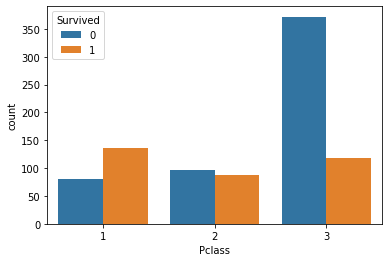

In [ ]:
# graficamos para ver si logramos ver algunas caracteristicas
sns.countplot(x='Pclass', hue='Survived', data=train)

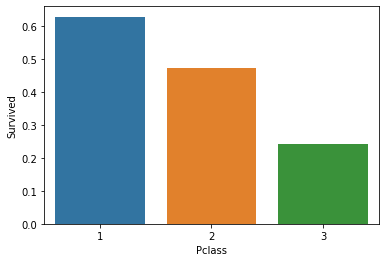

In [ ]:
s = train[['Survived','Pclass']].groupby('Pclass', as_index=False).mean().sort_values(by='Pclass')
sns.barplot(x='Pclass',y='Survived',data=s)

In [ ]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
# Analicemos la columna Name
train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [ ]:
# Es una columna de tipo object que muestra el nombre y una clase de sobrenombre procederemos a separarlo
def Extract(df):
  ap = df
  ap = train['Name'].str.split(expand=True)
  ap = ap[1].str.split(',' , expand=True)
  ap = ap[0].str.split('.', expand=True)
  ap = ap[0]
  return ap
def Insert(Nick,df):
  df = df.drop('Name',axis=1)
  df.insert(loc=2,column='Nick',value=Nick)
  return df

In [ ]:
# Funcion Extract depende del DateFrame y la Funcion Insert depende de valores y el DateFrame
Nick = Extract(train) 
train = Insert(Nick,train)

In [ ]:
train.head()

,Survived,Pclass,Nick,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S


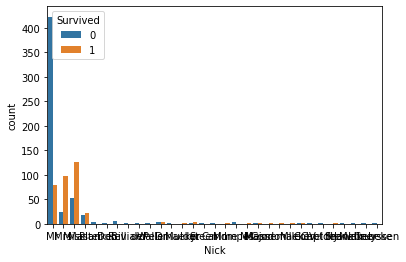

In [ ]:
# Ahora grafiquemoslo
sns.countplot(x='Nick',hue='Survived', data=train)
#Tenemos muchso Nicks asi que veremos como los reduciremos

In [ ]:
train['Nick'].value_counts()

Mr             502
Miss           179
Mrs            121
Master          40
Dr               7
Rev              6
y                4
Planke           3
Impe             3
Major            2
Col              2
Mlle             2
Gordon           2
Melkebeke        1
Mulder           1
der              1
Pelsmaeker       1
Cruyssen         1
Velde            1
Messemaeker      1
Don              1
Carlo            1
Shawah           1
Capt             1
Billiard         1
Walle            1
Steen            1
Mme              1
Ms               1
Jonkheer         1
the              1
Name: Nick, dtype: int64

In [ ]:
# Funcion que creara 5 grupos de apodos
def Nicks(df):
  
  return df

In [ ]:
train = Nicks(train)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


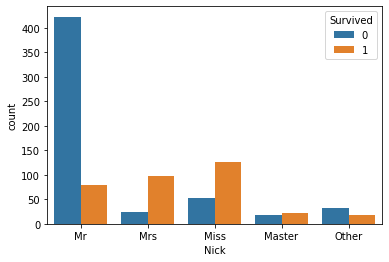

In [ ]:
# Que sobrenombre fue el que sobrevivio mas
sns.countplot(x='Nick',hue='Survived', data=train)

In [ ]:
a = train[['Nick','Survived']].groupby('Nick', as_index= False).mean().sort_values(by='Survived')

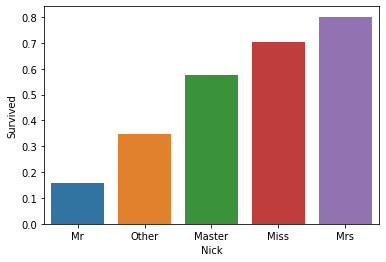

In [ ]:
sns.barplot(x=a['Nick'], y=a['Survived'])


In [ ]:
# Ahora solo convertimos la variable categorica en una numerica al igual que el sexo
def conversion(df):
  mapeado = {'Mr':1,'Mrs':2,'Miss':3,'Master':4,'Other':5}
  for dataset in df:
    df['Nick'] = df['Nick'].map(mapeado)
    df['Nick'] = df['Nick'].fillna(0)
    return df
def sexo(df):
  sexo = {'male':1,'female':0}
  for dataset in df:
    df['Sex'] = df['Sex'].map(sexo)
    df['Sex'] = df['Sex'].fillna(0)
    return df

In [ ]:
train = conversion(train)


In [ ]:
train = sexo(train)

In [ ]:
train

,Survived,Pclass,Nick,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,1,1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,2,0,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,2,0,35.0,1,0,113803,53.1000,C123,S
4,0,3,1,1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,5,1,27.0,0,0,211536,13.0000,NaN,S
887,1,1,3,0,19.0,0,0,112053,30.0000,B42,S
888,0,3,3,0,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,1,1,26.0,0,0,111369,30.0000,C148,C


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Nick      891 non-null    int64  
 3   Sex       891 non-null    int64  
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 76.7+ KB


In [ ]:
# Analizamos la columna Age que esta incompleta
train['Age'].describe()


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

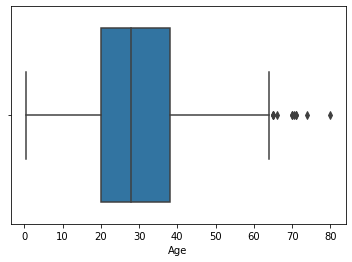

In [ ]:
sns.boxplot(x='Age', data=train)

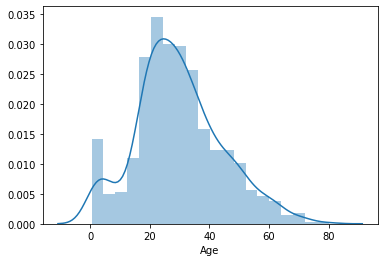

In [ ]:
# Tenemos varios valores atipicos asi que veamoslos mas a profundidad
sns.distplot(train['Age'])

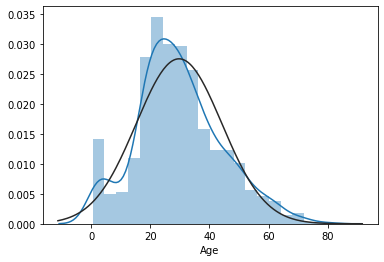

In [ ]:
# tiene semejanza a una distribucion normal asi que veamosla mas a fondo
sns.distplot(train['Age'], fit= norm)

In [ ]:
train.info()
# Dejemos esta al final ya que tener una cantidad considerable de datos perdidos asi que veremos si hay una relacion entre otras columnas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Nick      891 non-null    int64  
 3   Sex       891 non-null    int64  
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 76.7+ KB


In [ ]:
# Analizamos SibSp que son los familiares que vienen 
train[['SibSp']].describe()

,SibSp
count,891.000000
mean,0.523008
std,1.102743
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,8.000000


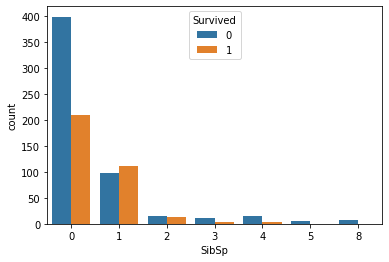

In [ ]:
sns.countplot(x='SibSp', hue='Survived', data=train)

In [ ]:
train[['Survived','SibSp']].groupby('SibSp', as_index= False).mean().sort_values(by='SibSp', ascending=True)

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [ ]:
# Analizamos a la siguiente columna que es Parch
train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

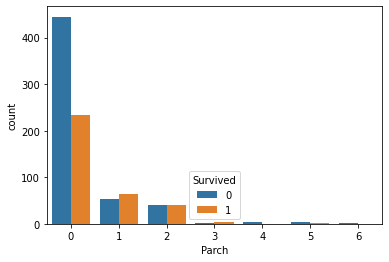

In [ ]:
sns.countplot(x='Parch',hue='Survived',data=train)

In [ ]:
train[['Parch','Survived']].groupby('Parch', as_index=False).mean().sort_values('Parch', ascending =True)

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [ ]:
# Ahora creamos una categoria que sea la suma de las 2 categorias Parch y SibSp
def suma(df):
  for dataset in df:
    df['Family Size'] = df['Parch'] + df['SibSp'] + 1
    return df
def eliminacion(df):
  df = df.drop(['Parch','SibSp'], axis=1)
  return  df

In [ ]:
train = suma(train)

In [ ]:
train = eliminacion(train)

In [ ]:
train[['Survived','Family Size']].groupby('Family Size', as_index=False).mean()

,Family Size,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [ ]:
# Analizamos la columna fare
train.Fare

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

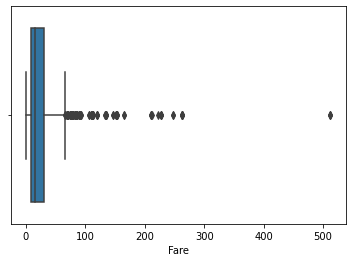

In [ ]:
# Hay Muchos puntos afuera asi que normalicemos
sns.boxplot(train.Fare)

In [ ]:
a = np.log((train.Fare)+1)

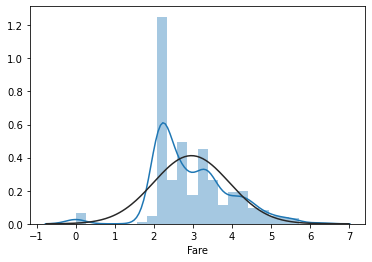

In [ ]:
# Estos son los datos ya normalizados y ya no hay tantos datos fuera de rango se asemeja
sns.distplot(a,fit = norm)

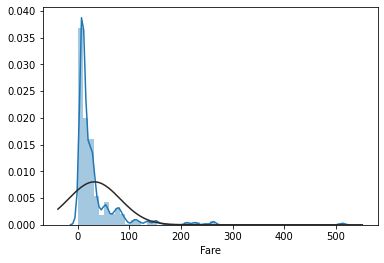

In [ ]:
# Antes de la normalizacion
sns.distplot(train.Fare, fit=norm)

In [ ]:
# Asi que aplicaremos una normalizacion
def normalizacion(df):
  df['Fare'] = np.log((df['Fare'])+1)
  return df

In [ ]:
train = normalizacion(train)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Nick         891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          714 non-null    float64
 5   Ticket       891 non-null    object 
 6   Fare         891 non-null    float64
 7   Cabin        204 non-null    object 
 8   Embarked     889 non-null    object 
 9   Family Size  891 non-null    int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [ ]:
# Analizamos la columna Embarked
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

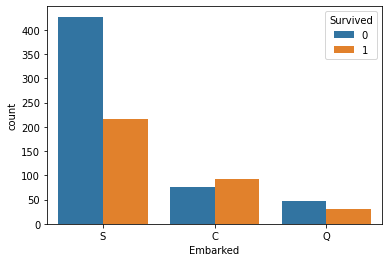

In [ ]:
sns.countplot(x='Embarked', hue='Survived', data=train)

In [ ]:
train[['Survived','Embarked']].groupby('Embarked', as_index= False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [ ]:

train1 = train.copy()
train2 = train.copy()

In [ ]:
train = train.drop('Cabin',axis=1)

In [ ]:
# Interplaremos de 2 maneras
train2.interpolate(method='linear',limit_direction='forward')

,Survived,Pclass,Nick,Sex,Age,Ticket,Fare,Cabin,Embarked,Family Size
0,0,3,1,1,22.0,A/5 21171,2.110213,NaN,S,2
1,1,1,2,0,38.0,PC 17599,4.280593,C85,C,2
2,1,3,3,0,26.0,STON/O2. 3101282,2.188856,NaN,S,1
3,1,1,2,0,35.0,113803,3.990834,C123,S,2
4,0,3,1,1,35.0,373450,2.202765,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,5,1,27.0,211536,2.639057,NaN,S,1
887,1,1,3,0,19.0,112053,3.433987,B42,S,1
888,0,3,3,0,22.5,W./C. 6607,3.196630,NaN,S,4
889,1,1,1,1,26.0,111369,3.433987,C148,C,1


In [ ]:
train2 = train2.interpolate(method='linear', limit_direction='forward')

In [ ]:
a

0      2.110213
1      4.280593
2      2.188856
3      3.990834
4      2.202765
         ...   
886    2.639057
887    3.433987
888    3.196630
889    3.433987
890    2.169054
Name: Fare, Length: 891, dtype: float64

In [ ]:
# Imputar de una manera avanzada (predecir valores Nan)
knn = KNNImputer(n_neighbors=2,weights='uniform') 
train1['Age'] = knn.fit_transform(train1[['Age']])
# 2 parentesis para no tener problemas dimensionales

In [ ]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Nick         891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   Ticket       891 non-null    object 
 6   Fare         891 non-null    float64
 7   Cabin        204 non-null    object 
 8   Embarked     889 non-null    object 
 9   Family Size  891 non-null    int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [ ]:
train1 = train1.drop('Cabin', axis=1)

In [ ]:
def embarcao(df):
  for dataset in df:
    mapi = {'S':0,"C":1,"Q":2}
    df['Embarked'] = df['Embarked'].map(mapi)
    df['Embarked'] = df['Embarked'].fillna(0)
    return df

In [ ]:
train1 = embarcao(train1)


In [ ]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Nick         891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   Ticket       891 non-null    object 
 6   Fare         891 non-null    float64
 7   Embarked     891 non-null    float64
 8   Family Size  891 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 62.8+ KB


In [ ]:
X = ['Pclass','Nick','Sex','Age','Fare','Embarked','Family Size']
Y = ['Survived']
X = train1[X]
Y = train1[Y]

In [ ]:
X

,Pclass,Nick,Sex,Age,Fare,Embarked,Family Size
0,3,1,1,22.000000,2.110213,0.0,2
1,1,2,0,38.000000,4.280593,1.0,2
2,3,3,0,26.000000,2.188856,0.0,1
3,1,2,0,35.000000,3.990834,0.0,2
4,3,1,1,35.000000,2.202765,0.0,1
...,...,...,...,...,...,...,...
886,2,5,1,27.000000,2.639057,0.0,1
887,1,3,0,19.000000,3.433987,0.0,1
888,3,3,0,29.699118,3.196630,0.0,4
889,1,1,1,26.000000,3.433987,1.0,1


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.10)

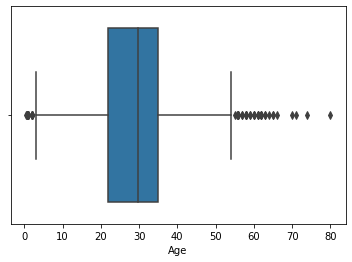

In [ ]:
sns.boxplot(X_train['Age'])

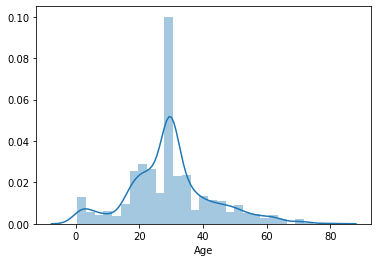

In [ ]:
# Transformamos la columna Age a algo mas normalizar
sns.distplot(X_train['Age'])

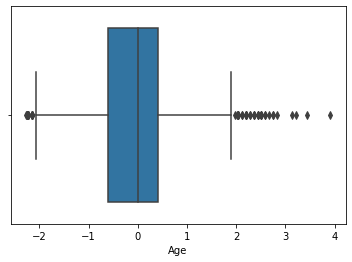

In [ ]:
sns.boxplot(X_train['Age'])

In [ ]:
# Aplicamos un modelo para ver su eficacia
KN = KNeighborsClassifier(n_neighbors=10, weights='uniform', algorithm='auto')
Tree = RandomForestClassifier(n_estimators= 90 ,criterion='gini' )
Logistica = LogisticRegression(penalty='l2',fit_intercept=True)
Gradiente = GradientBoostingClassifier(n_estimators=6,  learning_rate=0.579, max_features=5, max_depth=3)

In [ ]:
RandomForestClassifier?

In [ ]:
KN.fit(X_train,Y_train)
Tree.fit(X_train,Y_train)
Logistica.fit(X_train,Y_train)
Gradiente.fit(X_train,Y_train)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, 

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.579, loss='deviance', max_depth=3,
                           max_features=5, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=6,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
KN.score(X_test,Y_test) , Tree.score(X_test,Y_test) , Logistica.score(X_test,Y_test) , Gradiente.score(X_test,Y_test)

(0.753731343283582, 0.8283582089552238, 0.7611940298507462, 0.8283582089552238)